## Unlocking the Potential of Python NLTK Library: A Concise Analysis of Hotel Reviews
### Best Western Seven Seas in San Diego, California:

### Objective

The objective of this study is to analyze customer reviews with the aim of identifying areas for improvement in order to enhance the hotel's ranking.

By undertaking these analyses, the aim is to gain a comprehensive understanding of the hotel's current standing and identify areas for improvement. The findings will guide strategies to enhance the hotel's ranking, improve customer satisfaction, and ultimately drive its overall performance in the competitive hotel industry.

### Assessing the current status of this hotel
* [**Understand the data**](#Understand-the-data)
* [**Add Sentiment Score and Sentiment Label**](#Add-Sentiment-Score-and-Sentiment-Label)
* [**Create Three Review Rate Ranking List**](#Create-Three-Review-Rate-Ranking-List)
  * [Best Western Hotel Rankings Based on Review Ratings in the United States](#Best-Western-Hotel-Rankings-Based-on-Review-Ratings-in-the-United-States)
  * [Hotel Ranking Based on Review Ratings in California](#Hotel-Ranking-Based-on-Review-Ratings-in-California)
  * [Best Western Hotel Rankings Based on Review Ratings in California](#Best-Western-Hotel-Rankings-Based-on-Review-Ratings-in-California)
  <br/>
  Comparative analysis between these hotels and Best Western Seven Seas in San Diego, we can ascertain the performance of the latter relative to the establishments featured in these three aforementioned lists.
* [**Sentiment Distribution Analysis: User Reviews for Best Western Hotels**](#Sentiment-Distribution-Analysis)
<br/>
Analyzing the sentiment distribution of user reviews for Best Western Hotels in various locations, including San Diego, California, all hotels in California, hotels in San Diego specifically, Best Western Hotels in the United States, and Best Western Hotels in California. This analysis will provide insights into customer perceptions and experiences across different regions.

* [**Regional Variations: Average Hotel Ratings in San Diego, California by User Province**](#Regional-Variations)
<br/>
Average Hotel Ratings in San Diego, California by User Province:
I will examine the average hotel ratings in San Diego, California, considering the user's province. By comparing ratings from different provinces, such as California (CA), British Columbia (BC), Arizona (AZ), Illinois (IL), Minnesota (MN), New York (NY), and Texas (TX), I will identify any variations in customer satisfaction based on regional preferences.

* [**Provincial Analysis: Average Ratings by User Province for Best Western Seven Seas in San Diego**](#Provincial-Analysis)
<br/>
Average Ratings by User Province for Best Western Seven Seas in San Diego:
To gain deeper insights into the hotel's performance, I will analyze the average ratings given by users from different provinces specifically for the Best Western Seven Seas in San Diego. This analysis will help identify any variations in customer satisfaction based on the user's province and provide opportunities to address specific concerns or preferences.
<br/>

### Exploring strategies to attract a larger customer base to the establishment
* [**Charting Customer Reviews: Analyzing and Enhancing Hotel Ranking through Comprehensive Data Analysis**](#Charting-Customer-Reviews)
<br/>
Construct a comprehensive chart containing pertinent details pertaining to hotel reviews. The chart should encompass the following data:

  * The date of submission
  * review title, review text
  * review rating
  * sentiment score
  * sentiment label
  * word count of each review
 <br/>
 
* [**Unveiling Insights from Hotel Reviews: Leveraging User Location for Enhanced Guest Satisfaction and Business Growth**](#Unveiling-Insights-from-Hotel-Reviews)
<br/>
Construct a comprehensive chart containing pertinent details pertaining to hotel reviews. The chart should encompass the following data:

  * The date of submission
  * User's city and province
  * review title, review text
  * review rating
  * sentiment score
  * sentiment label
  * word count of each review

[Back to Assessing the current status of this hotel](#Assessing-the-current-status-of-this-hotel)
## Understand the data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-reviews/7282_1.csv
/kaggle/input/hotel-reviews/Datafiniti_Hotel_Reviews.csv
/kaggle/input/hotel-reviews/Datafiniti_Hotel_Reviews_Jun19.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Import the SentimentIntensityAnalyzer class from the nltk.sentiment module. 
# This class is used for sentiment analysis of text data.
from nltk.sentiment import SentimentIntensityAnalyzer

# Import the pyplot module from the matplotlib library, which provides a convenient
#interface for creating and customizing various types of plots.
import matplotlib.pyplot as plt

# Import the gridspec module from the matplotlib library, which allows for more 
# advanced customization of subplots and layouts in a figure.
import matplotlib.gridspec as gridspec

# Read a CSV file 
df = pd.read_csv('/kaggle/input/hotel-reviews/Datafiniti_Hotel_Reviews.csv')
df.head(5)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,NaN,NaN,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
1,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-02T00:00:00Z,2016-08-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,NaN,NaN,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
2,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-11-15T00:00:00Z,2016-08-23T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,NaN,NaN,Ron,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
3,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,"2016-05-21T00:00:00Z,2016-07-31T00:00:00Z",2.0,https://www.tripadvisor.com/Hotel_Review-g4118...,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",Richmond,VA,jaeem2016,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...
4,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,2016-07-31T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g4118...,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,Laurel,MD,MamaNiaOne,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...


Converts specific columns in a DataFrame (df) from a string format in ISO 8601 to a year and month format. This data preparation step ensures compatibility for future analysis. The resulting DataFrame's first five rows are then displayed.

In [3]:
# Specify the input and output date formats
input_format = '%Y-%m-%dT%H:%M:%SZ'
output_format = '%Y-%m'

# Convert specific columns to datetime format
date_columns = ['dateAdded', 'dateUpdated']
df[date_columns] = df[date_columns].apply(lambda x: pd.to_datetime(x, format=input_format))
df[date_columns] = df[date_columns].apply(lambda x: x.dt.strftime(output_format))

df.head(5)

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AVwc252WIN2L1WUfpqLP,2016-10,2018-09,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,NaN,NaN,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
1,AVwc252WIN2L1WUfpqLP,2016-10,2018-09,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-02T00:00:00Z,2016-08-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,NaN,NaN,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
2,AVwc252WIN2L1WUfpqLP,2016-10,2018-09,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-11-15T00:00:00Z,2016-08-23T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,NaN,NaN,Ron,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
3,AVwdOclqIN2L1WUfti38,2015-11,2018-09,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,"2016-05-21T00:00:00Z,2016-07-31T00:00:00Z",2.0,https://www.tripadvisor.com/Hotel_Review-g4118...,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",Richmond,VA,jaeem2016,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...
4,AVwdOclqIN2L1WUfti38,2015-11,2018-09,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,2016-07-31T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g4118...,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,Laurel,MD,MamaNiaOne,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  object 
 1   dateAdded             10000 non-null  object 
 2   dateUpdated           10000 non-null  object 
 3   address               10000 non-null  object 
 4   categories            10000 non-null  object 
 5   primaryCategories     10000 non-null  object 
 6   city                  10000 non-null  object 
 7   country               10000 non-null  object 
 8   keys                  10000 non-null  object 
 9   latitude              10000 non-null  float64
 10  longitude             10000 non-null  float64
 11  name                  10000 non-null  object 
 12  postalCode            10000 non-null  object 
 13  province              10000 non-null  object 
 14  reviews.date          10000 non-null  object 
 15  reviews.dateSeen    

In [5]:
df.describe()

,latitude,longitude,reviews.rating
count,10000.000000,10000.000000,10000.000000
mean,37.003630,-92.675934,4.034265
std,5.517273,19.347989,1.162240
min,19.438604,-159.474930,1.000000
25%,33.927588,-111.622343,3.350000
50%,37.785060,-84.452114,4.000000
75%,40.416380,-77.052700,5.000000
max,70.133620,-68.203990,5.000000


**Question 1:** When reviewing the first few rows of the dataframe, what do you observe about the data? What does each row represent?

Looking at the first few rows of the dataframe, we can observe the following:

* Each row represents a review or feedback for a particular establishment, such  as a hotel or motel.
* The data contains information such as the ID of the establishment, the date it was added and updated, the address, categories, primary categories, city, country, latitude, longitude, name, postal code, province, reviews' date, reviews' rating, reviews' source URLs, reviews' text and title, reviews' user city and province, reviews' username, source URLs, and websites.
* The data seems to be related to accommodations and food services, with a focus on hotels, motels, and related categories.

<br/>

**Question 2:** When reviewing the data.info() output, what do you notice about the different variables? Are there any null values? Are all of the variables numeric? Does anything else stand out?

Analyzing the data.info() output, we can observe the following:

* The dataset contains a total of 10,000 entries (rows).
* There are 25 columns in the dataset, with a mix of numeric and non-numeric (object) data types.
* The "reviews.text" and "reviews.title" columns have one missing value each (9999 non-null entries out of 10000).
* The "reviews.userCity" column has 4,164 non-null values, indicating that some users have provided their city information, while others have not.
* The "reviews.userProvince" column has 2,705 non-null values, indicating that some users have provided their province information, while others have not.

<br/>

**Question 3:** When reviewing the data.describe() output, what do you notice about the distributions of each variable? Are there any questionable values? Does it seem that there are outlier values?

Examining the data.describe() output, we can observe the following:

* The "latitude" variable ranges from approximately 19.44 to 70.13, with a mean of 37.00 and a standard deviation of 5.52.
* The "longitude" variable ranges from approximately -159.47 to -68.20, with a mean of -92.68 and a standard deviation of 19.35.
* The "reviews.rating" variable ranges from 1.00 to 5.00, with a mean of 4.03 and a standard deviation of 1.16.
* There are no obviously questionable or invalid values based on the provided summary statistics.
* It is possible that some extreme values could be considered outliers, such as very high or very low latitude or longitude values. However, without further analysis or domain knowledge, it is difficult to definitively label any specific values as outliers.

[Back to Assessing the current status of this hotel](#Assessing-the-current-status-of-this-hotel)
## Add Sentiment Score and Sentiment Label

In [6]:
# The code defines a function to perform sentiment analysis on a DataFrame using 
# the SentimentIntensityAnalyzer. It calculates sentiment scores, assigns sentiment
# labels, and provides counts of reviews in each sentiment category.

def calculate_sentiment(data_frame):
    # Initialize the sentiment analyzer
    sia = SentimentIntensityAnalyzer()

    # Calculate the sentiment scores for each review
    data_frame['Sentiment_Score'] = data_frame['reviews.text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

    # Assign sentiment labels based on the compound score
    data_frame['Sentiment_Label'] = data_frame['Sentiment_Score'].apply(
        lambda x: 'Positive' if x >= 0.2 else 'Negative' if x <= -0.2 else 'Neutral'
    )

    # Count the number of reviews in each sentiment category
    sentiment_counts = data_frame['Sentiment_Label'].value_counts()

    # Assign sentiment counts to the DataFrame
    data_frame['Sentiment_Count'] = data_frame['Sentiment_Label'].map(sentiment_counts)

    # Print the sentiment counts
    data_frame.apply(lambda x: print(f"{x['Sentiment_Label']}: {x['Sentiment_Count']} reviews"), axis=1)

    return data_frame

In [7]:
# Create five new DataFrames
ca_hotel = df[df['province']=='CA']
sd_hotel= df[df['city']=='San Diego']
bw_us = df[df['name'].str.contains('Best Western')]
bw_ca = ca_hotel[ca_hotel['name'].str.contains('Best Western')]
bw_sd = sd_hotel[sd_hotel['name']=='Best Western Seven Seas']

In [8]:
#Call the calculate_sentiment() function with the five DataFrames. This function likely analyzes the sentiment of the text data within the each five hotel DataFrames.
calculate_sentiment(ca_hotel)
calculate_sentiment(sd_hotel)
calculate_sentiment(bw_us)
calculate_sentiment(bw_ca)
calculate_sentiment(bw_sd)

/tmp/ipykernel_20/2897867752.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['Sentiment_Score'] = data_frame['reviews.text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
/tmp/ipykernel_20/2897867752.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['Sentiment_Label'] = data_frame['Sentiment_Score'].apply(
/tmp/ipykernel_20/2897867752.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Positive: 880 reviews
Positive: 880 reviews
Positive: 880 reviews
Positive: 880 reviews
Positive: 880 reviews
Positive: 880 reviews
Neutral: 74 reviews
Positive: 880 reviews
Positive: 880 reviews
Positive: 880 reviews
Positive: 880 reviews
Positive: 880 reviews
Neutral: 74 reviews
Positive: 880 reviews
Positive: 880 reviews
Positive: 880 reviews
Positive: 880 reviews
Positive: 880 reviews
Positive: 880 reviews
Positive: 880 reviews
Positive: 880 reviews
Positive: 880 reviews
Positive: 880 reviews
Positive: 880 reviews
Positive: 880 reviews
Positive: 880 reviews
Neutral: 74 reviews
Negative: 99 reviews
Positive: 880 reviews
Positive: 880 reviews
Positive: 880 reviews
Positive: 880 reviews
Positive: 880 reviews
Positive: 880 reviews
Positive: 880 reviews
Neutral: 74 reviews
Positive: 880 reviews
Positive: 880 reviews
Positive: 880 reviews
Positive: 880 reviews
Positive: 880 reviews
Positive: 880 reviews
Positive: 880 reviews
Positive: 880 reviews
Negative: 99 reviews
Positive: 880 review

/tmp/ipykernel_20/2897867752.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['Sentiment_Score'] = data_frame['reviews.text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
/tmp/ipykernel_20/2897867752.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['Sentiment_Label'] = data_frame['Sentiment_Score'].apply(
/tmp/ipykernel_20/2897867752.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Positive: 941 reviews
Positive: 941 reviews
Negative: 108 reviews
Negative: 108 reviews
Positive: 941 reviews
Positive: 941 reviews
Positive: 941 reviews
Positive: 941 reviews
Positive: 941 reviews
Positive: 941 reviews
Positive: 941 reviews
Positive: 941 reviews
Positive: 941 reviews
Positive: 941 reviews
Positive: 941 reviews
Positive: 941 reviews
Positive: 941 reviews
Positive: 941 reviews
Positive: 941 reviews
Positive: 941 reviews
Positive: 941 reviews
Positive: 941 reviews
Positive: 941 reviews
Positive: 941 reviews
Positive: 941 reviews
Positive: 941 reviews
Positive: 941 reviews
Positive: 941 reviews
Positive: 941 reviews
Positive: 941 reviews
Positive: 941 reviews
Positive: 941 reviews
Positive: 941 reviews
Positive: 941 reviews
Positive: 941 reviews
Positive: 941 reviews
Positive: 941 reviews
Positive: 941 reviews
Negative: 108 reviews
Positive: 941 reviews
Positive: 941 reviews
Positive: 941 reviews
Positive: 941 reviews
Positive: 941 reviews
Positive: 941 reviews
Positive: 

/tmp/ipykernel_20/2897867752.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['Sentiment_Score'] = data_frame['reviews.text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
/tmp/ipykernel_20/2897867752.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['Sentiment_Label'] = data_frame['Sentiment_Score'].apply(
/tmp/ipykernel_20/2897867752.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites,Sentiment_Score,Sentiment_Label,Sentiment_Count
1609,AVwdDi4c_7pvs4fz1yly,2015-10,2018-08,411 Hotel Cir S,"Hotels,Restaurant,Hotels Motels,Accommodations...",Accommodation & Food Services,San Diego,US,us/ca/sandiego/411hotelcirs/2094732387,32.760746,...,Seriously security is too bed!! Some one stole...,It was an horrible trip,NaN,NaN,Jun,http://www.tripadvisor.com/Hotel_Review-g60750...,https://www.bestwestern.com/en_US/book/hotel-r...,0.4344,Positive,14
1610,AVwdDi4c_7pvs4fz1yly,2015-10,2018-08,411 Hotel Cir S,"Hotels,Restaurant,Hotels Motels,Accommodations...",Accommodation & Food Services,San Diego,US,us/ca/sandiego/411hotelcirs/2094732387,32.760746,...,"Near downtown sd, fashion shopping mall, easy ...",nice hotel near downtown SD,NaN,NaN,R,http://www.tripadvisor.com/Hotel_Review-g60750...,https://www.bestwestern.com/en_US/book/hotel-r...,0.7906,Positive,14
1611,AVwdDi4c_7pvs4fz1yly,2015-10,2018-08,411 Hotel Cir S,"Hotels,Restaurant,Hotels Motels,Accommodations...",Accommodation & Food Services,San Diego,US,us/ca/sandiego/411hotelcirs/2094732387,32.760746,...,We stay here everytime we're in town for the S...,Nice place and very affordable,NaN,NaN,beautygrad09,http://www.tripadvisor.com/Hotel_Review-g60750...,https://www.bestwestern.com/en_US/book/hotel-r...,0.9175,Positive,14
1612,AVwdDi4c_7pvs4fz1yly,2015-10,2018-08,411 Hotel Cir S,"Hotels,Restaurant,Hotels Motels,Accommodations...",Accommodation & Food Services,San Diego,US,us/ca/sandiego/411hotelcirs/2094732387,32.760746,...,Let's start wth the positives. The location is...,"So, so hotel.",ashton,NaN,sherdaveAshton,http://www.tripadvisor.com/Hotel_Review-g60750...,https://www.bestwestern.com/en_US/book/hotel-r...,-0.6042,Negative,4
1613,AVwdDi4c_7pvs4fz1yly,2015-10,2018-08,411 Hotel Cir S,"Hotels,Restaurant,Hotels Motels,Accommodations...",Accommodation & Food Services,San Diego,US,us/ca/sandiego/411hotelcirs/2094732387,32.760746,...,"Free parking, Free Wifi. Relative to other sim...",Location and WIFI were great!,Vancouver,BC,alvin_seetoh,http://www.tripadvisor.com/Hotel_Review-g60750...,https://www.bestwestern.com/en_US/book/hotel-r...,0.8658,Positive,14
1614,AVwdDi4c_7pvs4fz1yly,2015-10,2018-08,411 Hotel Cir S,"Hotels,Restaurant,Hotels Motels,Accommodations...",Accommodation & Food Services,San Diego,US,us/ca/sandiego/411hotelcirs/2094732387,32.760746,...,"Room was quiet. Pool and hot tub available, wh...",Staycation,NaN,NaN,Teresa,http://www.tripadvisor.com/Hotel_Review-g60750...,https://www.bestwestern.com/en_US/book/hotel-r...,0.4215,Positive,14
1615,AVwdDi4c_7pvs4fz1yly,2015-10,2018-08,411 Hotel Cir S,"Hotels,Restaurant,Hotels Motels,Accommodations...",Accommodation & Food Services,San Diego,US,us/ca/sandiego/411hotelcirs/2094732387,32.760746,...,"The staff were very friendly and helpful, but ...",Close to everything but watch the room type yo...,Calgary,NaN,SammyGirl1968,http://www.tripadvisor.com/Hotel_Review-g60750...,https://www.bestwestern.com/en_US/book/hotel-r...,-0.2551,Negative,4
1616,AVwdDi4c_7pvs4fz1yly,2015-10,2018-08,411 Hotel Cir S,"Hotels,Restaurant,Hotels Motels,Accommodations...",Accommodation & Food Services,San Diego,US,us/ca/sandiego/411hotelcirs/2094732387,32.760746,...,We were thrilled to find availability at this ...,Last Minute Trip,Litchfield Park,AZ,MariaElena H,http://www.tripadvisor.com/Hotel_Review-g60750...,https://www.bestwestern.com/en_US/book/hotel-r...,0.9521,Positive,14
1617,AVwdDi4c_7pvs4fz1yly,2015-10,2018-08,411 Hotel Cir S,"Hotels,Restaurant,Hotels Motels,Accommodations...",Accommodation & Food Services,San Diego,US,us/ca/sandiego/411hotelcirs/2094732387,32.760746,...,"Very nice room, comfortable bed with good HD T...",Good place to stay,Brawley,NaN,Kenneth S,http://www.tripadvisor.com/Hotel_Review-g60750...,https://www.bestwestern.

[Back to Assessing the current status of this hotel](#Assessing-the-current-status-of-this-hotel)
## Create Three Review Rate Ranking List

In [9]:
def calculate_hotel_ranking(hotel_df, title):
    # Calculate the average hotel rating grouped by city and name
    hotel_rate = hotel_df.groupby(['city', 'name'])[['reviews.rating']].mean(numeric_only=True).sort_values(by='reviews.rating', ascending=False)
    
    # Print the title
    print(title)
    
    # Reset the index and format the average rating to two decimal places
    rank_df = hotel_rate.reset_index().assign(average_rating=lambda x: x['reviews.rating'].apply(lambda rating: "{:.2f}".format(rating)))
    
    # Assign ranks to the hotels based on their index
    rank_df['rank'] = rank_df.index + 1
    
    # Print the ranking information for each hotel
    rank_df.apply(lambda row: print(f"#{row['rank']}: {row['city']}, Average Rating: {row['average_rating']}"), axis=1)


[Back to Assessing the current status of this hotel](#Assessing-the-current-status-of-this-hotel)
### Best Western Hotel Rankings Based on Review Ratings in the United States

In [10]:
calculate_hotel_ranking(bw_us, 'Best Western Hotel Rankings Based on Review Ratings in the United States:')

Best Western Hotel Rankings Based on Review Ratings in the United States:
#1: Ontario, Average Rating: 5.00
#2: Grand Island, Average Rating: 5.00
#3: Dillon, Average Rating: 5.00
#4: Pecos, Average Rating: 5.00
#5: East Peoria, Average Rating: 5.00
#6: Easton, Average Rating: 5.00
#7: Paola, Average Rating: 5.00
#8: McDonough, Average Rating: 5.00
#9: Oklahoma City, Average Rating: 5.00
#10: North Dartmouth, Average Rating: 5.00
#11: Florence, Average Rating: 5.00
#12: New Providence, Average Rating: 5.00
#13: Forest Grove, Average Rating: 5.00
#14: Grand Haven, Average Rating: 5.00
#15: Grove City, Average Rating: 5.00
#16: Saint Marys, Average Rating: 5.00
#17: Mount Vernon, Average Rating: 5.00
#18: Heber, Average Rating: 5.00
#19: Hope, Average Rating: 5.00
#20: Minot, Average Rating: 5.00
#21: Hugoton, Average Rating: 5.00
#22: Independence, Average Rating: 5.00
#23: Juneau, Average Rating: 5.00
#24: Katy, Average Rating: 5.00
#25: Kearney, Average Rating: 5.00
#26: Lafayette, Av

The ranking list consists of 172 hotels, providing valuable insights into their locations, names, and average ratings. Topping the list is the Best Western Inn Suites in Ontario, boasting an impressive average rating of 5.00. Other notable hotels in the top five include the Best Western Plus Grand Island Inn Suites in Grand Island, the Best Western Paradise Inn in Dillon, the Best Western Plus Swiss Chalet Hotel Suites in Pecos, and the Best Western Plus Peoria in East Peoria, all of which maintain an excellent average rating of 5.00.

While the Best Western Seven Seas in San Diego may not have secured a position among the top-ranked hotels, it still holds the 139th spot on the list with an average rating of 3.53. Situated in San Diego, this hotel offers a comfortable stay accompanied by a range of amenities and services. Although its ratings may not match those of the top performers, it consistently delivers a satisfactory experience to its guests.

The ranking list serves as a showcase for the diverse range of Best Western hotels scattered across the United States, with numerous locations receiving high ratings. It is crucial for hoteliers to understand that customer reviews and rankings play a vital role in the selection process of potential guests. Therefore, hotels should actively strive to enhance their rankings to attract a larger customer base. By focusing on improving customer satisfaction and optimizing their services, hotels can increase their appeal and secure a competitive edge in the industry.

[Back to Assessing the current status of this hotel](#Assessing-the-current-status-of-this-hotel)
### Hotel Ranking Based on Review Ratings in California

In [11]:
calculate_hotel_ranking(ca_hotel, 'Hotel Ranking Based on Review Ratings in California:')

Hotel Ranking Based on Review Ratings in California:
#1: Eureka, Average Rating: 5.00
#2: Long Beach, Average Rating: 5.00
#3: Lake Forest, Average Rating: 5.00
#4: Coronado, Average Rating: 5.00
#5: Napa, Average Rating: 5.00
#6: Oakland, Average Rating: 5.00
#7: Fresno, Average Rating: 5.00
#8: Ojai, Average Rating: 5.00
#9: Costa Mesa, Average Rating: 5.00
#10: Sunnyvale, Average Rating: 5.00
#11: Inglewood, Average Rating: 5.00
#12: Temecula, Average Rating: 5.00
#13: Pismo Beach, Average Rating: 5.00
#14: Eureka, Average Rating: 5.00
#15: Vista, Average Rating: 5.00
#16: Atascadero, Average Rating: 5.00
#17: Rancho Santa Fe, Average Rating: 5.00
#18: San Luis Obispo, Average Rating: 5.00
#19: Sacramento, Average Rating: 5.00
#20: Yountville, Average Rating: 5.00
#21: San Diego, Average Rating: 5.00
#22: San Diego, Average Rating: 5.00
#23: Lancaster, Average Rating: 5.00
#24: San Diego, Average Rating: 4.88
#25: Ukiah, Average Rating: 4.80
#26: Long Beach, Average Rating: 4.79
#27

The list provides a ranking of hotels in California, specifically in various cities. Each entry includes the hotel's ranking, location, hotel name, and average rating. The top-ranked hotels in California, with an average rating of 5.00, include Holiday Inn Express & Suites Eureka in Eureka, Rodeway Inn in Long Beach, and Candlewood Suites Orange County/Irvine East in Lake Forest, among others.
<br/>
The Best Western Seven Seas in San Diego is a hotel that holds the 115th position on the list of hotels in California, with an average rating of 3.53. 

[Back to Assessing the current status of this hotel](#Assessing-the-current-status-of-this-hotel)
### Best Western Hotel Rankings Based on Review Ratings in California

In [12]:
calculate_hotel_ranking(bw_ca, 'Best Western Hotel Rankings Based on Review Ratings in California:')

Best Western Hotel Rankings Based on Review Ratings in California:
#1: Ukiah, Average Rating: 4.80
#2: Santa Barbara, Average Rating: 4.70
#3: Twentynine Palms, Average Rating: 4.60
#4: Pasadena, Average Rating: 4.50
#5: Lake Elsinore, Average Rating: 4.50
#6: Calistoga, Average Rating: 4.33
#7: Long Beach, Average Rating: 4.25
#8: Napa, Average Rating: 4.15
#9: Anaheim, Average Rating: 4.11
#10: Orange, Average Rating: 4.00
#11: Palm Springs, Average Rating: 4.00
#12: Fairfield, Average Rating: 3.60
#13: San Diego, Average Rating: 3.53
#14: Monterey Park, Average Rating: 3.50
#15: Rancho Cucamonga, Average Rating: 3.50
#16: Valencia, Average Rating: 3.50
#17: Vallejo, Average Rating: 3.29
#18: Tracy, Average Rating: 3.20
#19: Temecula, Average Rating: 3.17
#20: Yuba City, Average Rating: 3.00
#21: El Cajon, Average Rating: 2.73
#22: Marina, Average Rating: 1.00


The ranking of Best Western Hotels in California showcases a diverse range of accommodations across the state. Topping the list is the Best Western Orchard Inn in Ukiah, with an impressive average rating of 4.80. The hotel offers excellent amenities and services, ensuring a pleasant stay for guests. Following closely is the Best Western Plus Encina Inn & Suites in Santa Barbara, ranked second with an average rating of 4.70. This hotel provides comfortable accommodations and is located in a convenient area.
<br/>
The Best Western Seven Seas in San Diego holds the 13th position on the ranking list of Best Western Hotels in California. It has an average rating of 3.53.


The Best Western Hotels in the United States are ranked based on their average ratings, with 172 hotels featured on the list. The top-ranked hotel is the Best Western Inn Suites in Ontario, boasting a perfect average rating of 5.00. Other top-rated hotels include the Best Western Plus Grand Island Inn Suites in Grand Island, the Best Western Paradise Inn in Dillon, the Best Western Plus Swiss Chalet Hotel Suites in Pecos, and the Best Western Plus Peoria in East Peoria, all with average ratings of 5.00.
<br/>
The Best Western Seven Seas in San Diego, although not among the top-ranked hotels, still maintains a decent rating of 3.53 and holds the 139th position on the list. It offers a comfortable stay with a range of amenities and services, ensuring a satisfactory experience for its guests.
<br/>
The ranking list showcases a diverse selection of Best Western hotels across the United States, with various locations receiving top ratings. It is crucial for hotels to improve their rankings to attract more customers, as guests often rely on reviews and rankings when choosing accommodations.
<br/>
In California, the ranking list focuses specifically on hotels in different cities. The top-ranked hotels in the state include Holiday Inn Express & Suites Eureka in Eureka, Rodeway Inn in Long Beach, and Candlewood Suites Orange County/Irvine East in Lake Forest, all with an average rating of 5.00.
<br/>
The Best Western Seven Seas in San Diego holds the 115th position on the list of California hotels, maintaining an average rating of 3.53. While not among the highest-rated hotels, it still provides a satisfactory experience for guests.
<br/>
The ranking of Best Western Hotels in California reflects a diverse range of accommodations throughout the state. The Best Western Orchard Inn in Ukiah tops the list with an impressive average rating of 4.80, offering excellent amenities and services for a pleasant stay. The Best Western Plus Encina Inn & Suites in Santa Barbara follows closely, ranked second with an average rating of 4.70. It provides comfortable accommodations in a convenient location.
<br/>
In summary, the ranking list of Best Western Hotels in the United States and California showcases a variety of hotels with different ratings. While the top-ranked hotels receive perfect ratings, the Best Western Seven Seas in San Diego, although not among the highest-rated, still offers a satisfactory experience for guests. It is essential for hotels to focus on improving their rankings to attract more customers who often rely on reviews and ratings when making their accommodation choices.

[Back to Assessing the current status of this hotel](#Assessing-the-current-status-of-this-hotel)
## Sentiment Distribution Analysis

### User Reviews for Best Western Hotels

In [13]:
def plot_sentiment_distribution(data, title):
    # Count the occurrences of each sentiment label
    sentiment_counts = data['Sentiment_Label'].value_counts()

    # Create a pie chart
    fig, ax = plt.subplots(figsize=(5, 5))
    
    # Set the layout of the subplots. Adjust the left value to move the chart to the middle
    fig.subplots_adjust(left=0.3)
    
    ax.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')

    # Set the title
    ax.set_title(title)

    # Display the chart
    plt.show()


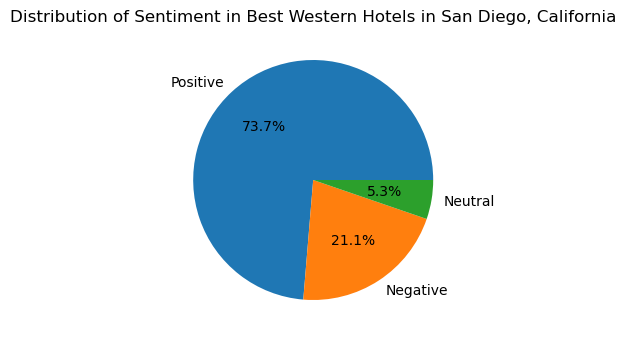

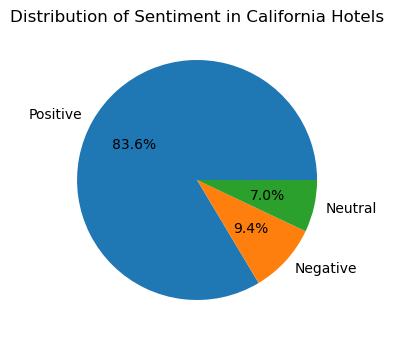

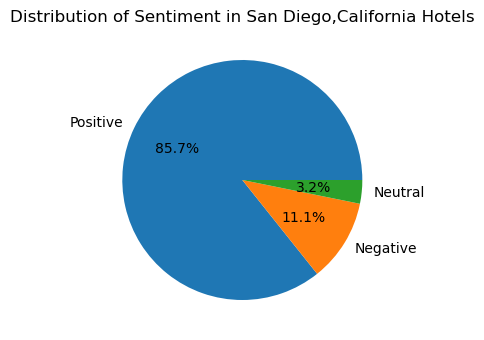

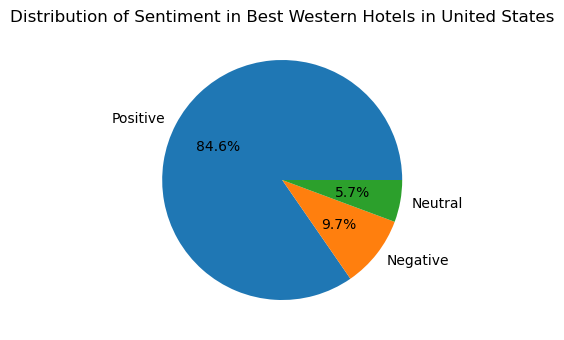

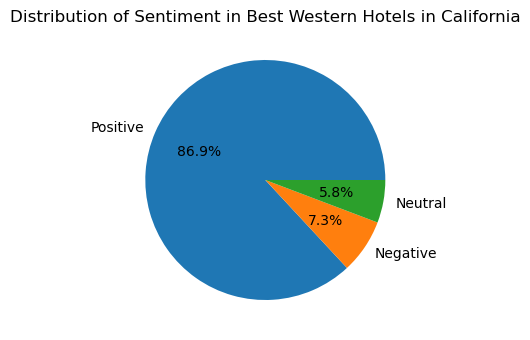

In [14]:
plot_sentiment_distribution(bw_sd, 'Distribution of Sentiment in Best Western Hotels in San Diego, California')
plot_sentiment_distribution(ca_hotel, 'Distribution of Sentiment in California Hotels')
plot_sentiment_distribution(sd_hotel, 'Distribution of Sentiment in San Diego,California Hotels')
plot_sentiment_distribution(bw_us, 'Distribution of Sentiment in Best Western Hotels in United States')
plot_sentiment_distribution(bw_ca, 'Distribution of Sentiment in Best Western Hotels in California')

Analysis of Sentiment Distribution in Best Western Hotels in Different Locations

The sentiment distribution data for Best Western Hotels in various locations provides valuable insights into customer perceptions and experiences across different regions. By combining and analyzing these data points, we can gain a comprehensive understanding of the overall sentiment towards Best Western Hotels.

Overall, Best Western Hotels receive predominantly positive sentiment across all the analyzed locations. Let's examine the combined sentiment distribution for Best Western Hotels in San Diego, California, all hotels in California, hotels in San Diego, California specifically, Best Western Hotels in the United States, and Best Western Hotels in California.

Positive sentiment:

* Best Western Hotels in San Diego, California: 73.7%
* All hotels in California: 83.6%
* Hotels in San Diego, California: 85.7%
* Best Western Hotels in the United States: 84.6%
* Best Western Hotels in California: 86.9%

<br/>
The positive sentiment is consistently high across all locations, ranging from 73.7% in San Diego, California specifically to 86.9% in Best Western Hotels in California. This indicates that the majority of customers had positive experiences and perceptions of Best Western Hotels in these areas.

Negative sentiment:

* Best Western Hotels in San Diego, California: 21.1%
* All hotels in California: 9.4%
* Hotels in San Diego, California: 11.1%
* Best Western Hotels in the United States: 9.7%
* Best Western Hotels in California: 7.3%

<br/>
The negative sentiment is relatively lower compared to the positive sentiment in all analyzed locations. The negative sentiment ranges from 7.3% in Best Western Hotels in California to 21.1% in Best Western Hotels in San Diego, California. These percentages indicate that a smaller proportion of customers had negative experiences or perceptions of Best Western Hotels in these areas.

Neutral sentiment:

* Best Western Hotels in San Diego, California: 5.3%
* All hotels in California: 7.0%
* Hotels in San Diego, California: 3.2%
* Best Western Hotels in the United States: 5.7%
* Best Western Hotels in California: 5.8%

<br/>
The neutral sentiment represents customers who had neither strongly positive nor negative experiences or perceptions. The percentage of neutral sentiment varies from 3.2% in hotels in San Diego, California to 7.0% in all hotels in California. These figures suggest that a small proportion of customers expressed neutral sentiment towards Best Western Hotels in these areas.

In summary, Overall, while Best Western Hotels in San Diego, California may show a slightly less positive sentiment and a slightly higher negative sentiment compared to other locations, it is essential to consider the context and the overall positive sentiment these hotels still maintain. 

[Back to Assessing the current status of this hotel](#Assessing-the-current-status-of-this-hotel)
## Regional Variations

### Average Hotel Ratings in San Diego, California by User Province

In [15]:
print('Average Hotel Rating in San Diego, California:', round(sd_hotel['reviews.rating'].mean(),2))

Average Hotel Rating in San Diego, California: 4.14


In [16]:
print('Average Hotel Ratings in San Diego, California Grouped by Hotel:')
sd_hotel.groupby(['name','id'])[['reviews.rating']].mean(numeric_only = True).round(2).sort_values(by=['reviews.rating'],ascending=True)

Average Hotel Ratings in San Diego, California Grouped by Hotel:


,,reviews.rating
name,id,
DoubleTree by Hilton Golf Resort San Diego,AVwcfADZIN2L1WUflcq2,3.00
Rodeway Inn San Diego Near Qualcomm Stadium,AVwckmGrByjofQCxfwut,3.00
Best Western Seven Seas,AVwdDi4c_7pvs4fz1yly,3.53
Hampton San Diego-Kearny Mesa,AVweXjkKkufWRAb5CTgt,4.00
SpringHill Suites San Diego Rancho Bernardo/Scripps Poway,AVwel0Z4_7pvs4fzEcCk,4.00
Courtyard San Diego Sorrento Valley,AVwcp0fTByjofQCxgszV,4.33
"The Dana On Mission Bay, BW Premier Collection",AVwc3vbXByjofQCxjGPg,4.50
The Westin San Diego Gaslamp Quarter,AVwdIiarByjofQCxl1TI,4.50
Fairmont Grand Del Mar,AVwcfFGw_7pvs4fzvk4S,4.88


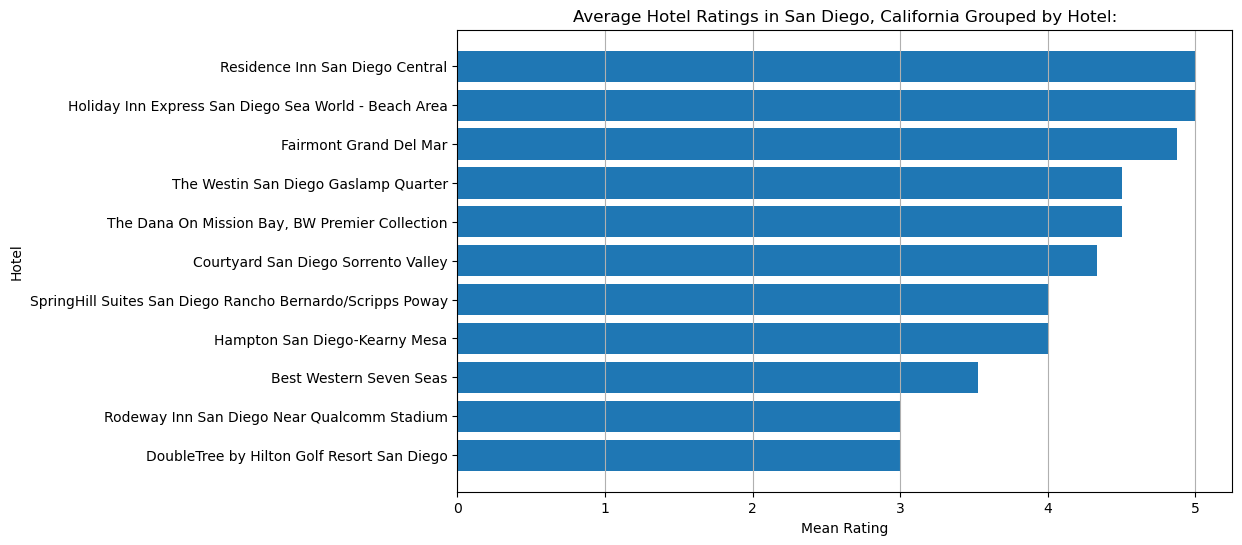

In [17]:
# Group the data and calculate the mean of 'reviews.rating'
grouped_data = sd_hotel.groupby(['name', 'id'])[['reviews.rating']].mean(numeric_only=True)
sorted_data = grouped_data.sort_values(by=['reviews.rating'], ascending=True)

# Create a bar chart
plt.figure(figsize=(10, 6))  # Set the size of the figure

# Plot the data
plt.barh(sorted_data.index.get_level_values(0), sorted_data['reviews.rating'])

# Customize the chart
plt.xlabel('Mean Rating')
plt.ylabel('Hotel')
plt.title('Average Hotel Ratings in San Diego, California Grouped by Hotel:')
plt.grid(axis='x')

# Show the chart
plt.show()

When examining the average hotel ratings in San Diego, California, it is evident that the Best Western Seven Seas is performing well with a rating of 3.53. However, there is room for improvement when compared to other hotels. The DoubleTree by Hilton Golf Resort San Diego and Rodeway Inn San Diego Near Qualcomm Stadium have lower average ratings of 3.0, indicating potential areas for enhancement in guest satisfaction. On the other hand, Hampton San Diego-Kearny Mesa and SpringHill Suites San Diego Rancho Bernardo/Scripps Poway are on par with Best Western Seven Seas, both receiving a rating of 4.0. To remain competitive, the management of Best Western Seven Seas should analyze the strengths and weaknesses of higher-rated hotels such as Courtyard San Diego Sorrento Valley, The Dana On Mission Bay, BW Premier Collection, and The Westin San Diego Gaslamp Quarter, which boast ratings of 4.33 and 4.50 respectively. Moreover, Fairmont Grand Del Mar sets a high standard with an impressive average rating of 4.88. By studying these successful establishments, the hotel management of Best Western Seven Seas can identify strategies to elevate guest satisfaction and improve their overall rating.

In [18]:
print('Average Hotel Ratings in San Diego, California Grouped by User Province:')

#find out have both California and CA. Temporarily combine these two together
sd_hotel = sd_hotel.replace('California','CA')

sd_hotel.groupby(['reviews.userProvince'])[['reviews.rating']].mean(numeric_only = True).sort_values(by='reviews.rating',ascending = True)

Average Hotel Ratings in San Diego, California Grouped by User Province:


,reviews.rating
reviews.userProvince,
BC,3.0
CA,3.4
AZ,5.0
IL,5.0
MN,5.0
NY,5.0
TX,5.0


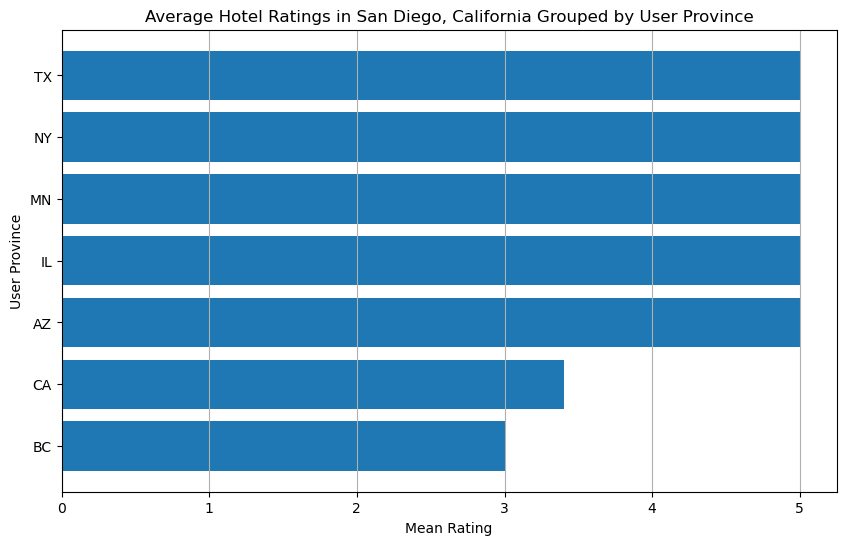

In [19]:
# Group the data by 'reviews.userProvince' and calculate the mean of 'reviews.rating'
grouped_data = sd_hotel.groupby(['reviews.userProvince'])[['reviews.rating']].mean(numeric_only=True)

# Sort the data in ascending order based on the mean rating
sorted_data = grouped_data.sort_values(by='reviews.rating', ascending=True)

# Create a bar chart with a figure size of 10x6
plt.figure(figsize=(10, 6))

# Plot the sorted data as a horizontal bar chart
plt.barh(sorted_data.index, sorted_data['reviews.rating'])

# Customize the chart by adding labels and a title
plt.xlabel('Mean Rating')
plt.ylabel('User Province')
plt.title('Average Hotel Ratings in San Diego, California Grouped by User Province')

# Add gridlines to the x-axis
plt.grid(axis='x')

# Display the chart
plt.show()

The average hotel ratings in San Diego, California vary depending on the user's province. Users from British Columbia (BC) have an average rating of 3.0, while users from California (CA) have a slightly higher average rating of 3.4. On the other hand, users from Arizona (AZ), Illinois (IL), Minnesota (MN), New York (NY), and Texas (TX) consistently rate the hotels in San Diego with a perfect score of 5.0. These ratings suggest that visitors from these provinces generally have a positive perception of the hotels in San Diego, with AZ, IL, MN, NY, and TX users being particularly satisfied with their experiences.

[Back to Assessing the current status of this hotel](#Assessing-the-current-status-of-this-hotel)
## Provincial Analysis

### Average Ratings by User Province for Best Western Seven Seas in San Diego

In [20]:
print('Average Best Western Seven Seas Hotel Rating in San Diego, California Grouped by User Province:')

# Define the hotel name to analyze
name = 'Best Western Seven Seas'

# Filter the data to include only the specified hotel and group it by 'reviews.userProvince'
grouped_data = sd_hotel.loc[sd_hotel['name'] == name].groupby(['reviews.userProvince'])[['reviews.rating']].mean(numeric_only=True)

# Sort the grouped data in ascending order based on the mean rating
sorted_data = grouped_data.sort_values(by='reviews.rating', ascending=True)

# Display the resulting data
result = sorted_data
result


Average Best Western Seven Seas Hotel Rating in San Diego, California Grouped by User Province:


,reviews.rating
reviews.userProvince,
CA,2.5
BC,3.0
AZ,5.0


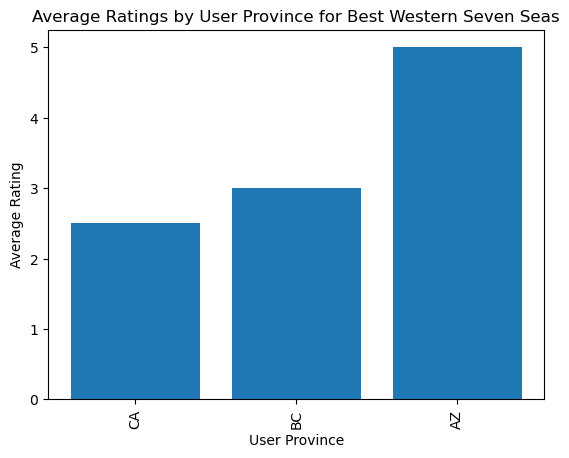

In [21]:
# Create a bar chart with the resulting data
plt.bar(result.index, result['reviews.rating'])

# Add labels for the x-axis and y-axis
plt.xlabel('User Province')
plt.ylabel('Average Rating')

# Set the title of the chart, using the hotel name variable
plt.title('Average Ratings by User Province for {}'.format(name))

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()


The Best Western Seven Seas Hotel in San Diego, California, received average ratings based on user provinces. In the province of CA, the average rating was 2.5, indicating a below-average satisfaction level. BC, on the other hand, had an average rating of 3.0, suggesting a slightly better experience. In contrast, users from the province of AZ had the highest average rating of 5.0, indicating a significantly positive perception of the hotel. These ratings imply that the hotel's performance varied among different user provinces, with users from AZ having the most favorable opinion, while CA users expressed the lowest level of satisfaction.

In conclusion, the sentiment distribution and average ratings provide valuable insights into customer perceptions and experiences regarding Best Western Hotels. By considering these findings, the management of Best Western Seven Seas can focus on enhancing guest satisfaction, addressing specific concerns, and learning from successful hotels to improve their overall performance and ranking.

[Back to Exploring strategies to attract a larger customer base to the establishment](#Exploring-strategies-to-attract-a-larger-customer-base-to-the-establishment)
## Charting Customer Reviews

### Analyzing and Enhancing Hotel Ranking through Comprehensive Data Analysis

In [22]:
#Keep the columns we need
keep_cols = ['dateAdded','reviews.title','reviews.text','reviews.rating','Sentiment_Score','Sentiment_Label']
bw_sd_1 = bw_sd[keep_cols]

#Remove rows without data
bw_sd_1 = bw_sd_1.dropna(subset=keep_cols)
    
#Add num words and keep only those with enough data to make conclusions
bw_sd_1['num_words'] = (bw_sd_1['reviews.title'] + bw_sd_1['reviews.text']).apply(lambda x: len(x.split(" ")))
bw_sd_1 = bw_sd_1[bw_sd_1['num_words'] >= 0]

bw_sd_1.sort_values(by=['Sentiment_Score'],ascending = False)

,dateAdded,reviews.title,reviews.text,reviews.rating,Sentiment_Score,Sentiment_Label,num_words
1618,2015-10,Nice Place,"Nice hotel, great location, easy access to fre...",4.0,0.9815,Positive,65
1622,2015-10,San Diego Stay,This is a terrific hotel. I make it a point to...,5.0,0.9682,Positive,48
1616,2015-10,Last Minute Trip,We were thrilled to find availability at this ...,5.0,0.9521,Positive,63
1619,2015-10,Awesome staff.....mostly. Great hotel otherwise!,"front desk was awesome, housekeeping was aweso...",5.0,0.9484,Positive,83
1617,2015-10,Good place to stay,"Very nice room, comfortable bed with good HD T...",5.0,0.9465,Positive,49
1627,2015-10,Excellent Motel--Stay here--Look No further!,I was very apprehensive about staying here hav...,5.0,0.9371,Positive,65
1611,2015-10,Nice place and very affordable,We stay here everytime we're in town for the S...,5.0,0.9175,Positive,41
1613,2015-10,Location and WIFI were great!,"Free parking, Free Wifi. Relative to other sim...",3.0,0.8658,Positive,65
1610,2015-10,nice hotel near downtown SD,"Near downtown sd, fashion shopping mall, easy ...",4.0,0.7906,Positive,21
1624,2015-10,Ok,Not bad.. Room is nice. I asked for a Bottom f...,3.0,0.7184,Positive,54


The chart provides information about hotel reviews, including the date added, review title, review text, review rating, sentiment score, sentiment label, and the number of words in each review. The sentiment scores range from positive (values close to 1) to negative (values close to -1), with neutral sentiment scores near 0. The chart demonstrates that most reviews are positive, with high ratings and sentiment scores. Positive aspects mentioned include a nice hotel, great location, friendly staff, comfortable rooms, and amenities like free parking and Wi-Fi. However, there are a few negative reviews mentioning issues such as slow internet, noise, theft, and cleanliness concerns.
<br/>
To utilize this information to improve the hotel and increase its ranking, several actions can be taken:

* **Identify areas of strength:** Analyze positive reviews to identify the hotel's strong points, such as a great location, friendly staff, comfortable rooms, and desirable amenities. Highlight and emphasize these aspects in marketing materials and guest interactions to attract more positive reviews.

* **Address negative feedback:** Focus on negative reviews to pinpoint areas that need improvement. For example, slow internet, noise issues, theft concerns, and cleanliness problems mentioned in the reviews should be addressed promptly. Take necessary steps to rectify these issues and ensure a better guest experience.

* **Enhance guest satisfaction:** Pay attention to the sentiment scores and labels. Consistently positive sentiment indicates a satisfied customer base. However, negative sentiment or neutral sentiments could indicate potential areas for improvement. Identify the root causes of negative sentiments and take proactive measures to address them, thereby enhancing guest satisfaction.

* **Encourage guest feedback:** Actively seek guest feedback through surveys, review platforms, and direct communication. This will provide additional insights into guest preferences, areas for improvement, and potential opportunities for enhancing the hotel's offerings.

* **Implement a reputation management strategy:** Monitor and respond to online reviews promptly. Engage with guests by thanking them for positive reviews and addressing any concerns raised in negative reviews. Show genuine care and commitment to guest satisfaction, which can positively impact the hotel's online reputation.

* **Train and empower staff:** Provide regular training to staff members on guest service, problem resolution, and attention to detail. Empower them to go the extra mile in delivering exceptional guest experiences. Happy guests are more likely to leave positive reviews and recommend the hotel to others.

By leveraging the information from the chart and implementing these strategies, the hotel can improve its overall guest experience, increase positive reviews, and subsequently enhance its ranking and reputation in the industry.

[Back to Exploring strategies to attract a larger customer base to the establishment](#Exploring-strategies-to-attract-a-larger-customer-base-to-the-establishment)
## Unveiling Insights from Hotel Reviews

### Leveraging User Location for Enhanced Guest Satisfaction and Business Growth

In [23]:
bw_sd['reviews.userCity'] = bw_sd['reviews.userCity'].fillna('N/A')
bw_sd['reviews.userProvince'] = bw_sd['reviews.userProvince'].fillna('N/A')

# Keep the columns we need
keep_cols = ['dateAdded', 'reviews.userCity', 'reviews.userProvince', 'reviews.title', 'reviews.text', 'reviews.rating', 'Sentiment_Score', 'Sentiment_Label']
bw_sd_2 = bw_sd[keep_cols]

# Remove rows without data
bw_sd_2 = bw_sd_2.dropna(subset=keep_cols)

# Add empty values to columns 'reviews.userCity' and 'reviews.userProvince'
bw_sd_2['reviews.userCity'] = bw_sd_2['reviews.userCity'].fillna('')
bw_sd_2['reviews.userProvince'] = bw_sd_2['reviews.userProvince'].fillna('')

# Add num words and keep only those with enough data to make conclusions
bw_sd_2['num_words'] = (bw_sd_2['reviews.title'] + bw_sd_2['reviews.text']).apply(lambda x: len(x.split(" ")))
bw_sd_2 = bw_sd_2[bw_sd_2['num_words'] >= 0]

bw_sd_2.sort_values(by=['Sentiment_Score'], ascending=False)

,dateAdded,reviews.userCity,reviews.userProvince,reviews.title,reviews.text,reviews.rating,Sentiment_Score,Sentiment_Label,num_words
1618,2015-10,N/A,N/A,Nice Place,"Nice hotel, great location, easy access to fre...",4.0,0.9815,Positive,65
1622,2015-10,Havelock,N/A,San Diego Stay,This is a terrific hotel. I make it a point to...,5.0,0.9682,Positive,48
1616,2015-10,Litchfield Park,AZ,Last Minute Trip,We were thrilled to find availability at this ...,5.0,0.9521,Positive,63
1619,2015-10,N/A,N/A,Awesome staff.....mostly. Great hotel otherwise!,"front desk was awesome, housekeeping was aweso...",5.0,0.9484,Positive,83
1617,2015-10,Brawley,N/A,Good place to stay,"Very nice room, comfortable bed with good HD T...",5.0,0.9465,Positive,49
1627,2015-10,N/A,N/A,Excellent Motel--Stay here--Look No further!,I was very apprehensive about staying here hav...,5.0,0.9371,Positive,65
1611,2015-10,N/A,N/A,Nice place and very affordable,We stay here everytime we're in town for the S...,5.0,0.9175,Positive,41
1613,2015-10,Vancouver,BC,Location and WIFI were great!,"Free parking, Free Wifi. Relative to other sim...",3.0,0.8658,Positive,65
1610,2015-10,N/A,N/A,nice hotel near downtown SD,"Near downtown sd, fashion shopping mall, easy ...",4.0,0.7906,Positive,21
1624,2015-10,Camarillo,CA,Ok,Not bad.. Room is nice. I asked for a Bottom f...,3.0,0.7184,Positive,54


The provided chart represents a collection of hotel reviews, including information such as the date added, user city, user province/state, review title, review text, review rating, sentiment score, sentiment label, and the number of words in the review. These reviews offer valuable insights into guests' experiences and perceptions of various hotels. By analyzing this data, hotels can gain a deeper understanding of customer preferences, improve their services, and enhance overall guest satisfaction. In the following sections, we will explore the implications and potential applications of this information for hotels.
<br/>
Knowing the review's user city and province/state can provide valuable insights and benefits for the hotel. Here are a few ways you can utilize this information:
* **Targeted marketing and promotions:** By analyzing the user cities and provinces/states associated with positive reviews, you can identify key geographical areas where the hotel is popular or has a strong customer base. This information can help you target marketing campaigns and promotions specifically towards those regions. For example, you could create targeted online ads or promotional offers for residents of those cities or states, increasing the likelihood of attracting more guests from those areas.
* **Identify customer preferences:** Analyzing user cities and provinces/states can provide insights into specific customer preferences or trends. You can look for patterns in reviews from certain locations to understand what amenities, services, or features are highly valued by guests from those areas. This information can guide your decision-making process in terms of enhancing or expanding specific offerings that are popular among guests from specific regions.
* **Reputation management:** By knowing the user city and province/state associated with each review, you can effectively manage your online reputation. If you notice a negative review from a particular location, you can promptly respond to the feedback and address any concerns raised. This demonstrates your commitment to guest satisfaction and can help mitigate any potential negative impact on your hotel's reputation.
* **Guest segmentation and personalized experiences:** By analyzing the user cities and provinces/states, you can segment your guests based on their geographical location. This segmentation can help you provide more personalized experiences for guests from different regions. For example, you can offer tailored recommendations or services that cater to the preferences or interests of guests from specific cities or states, creating a more customized and memorable stay.
* **Geographical expansion and partnerships:** If you notice a high concentration of positive reviews from specific cities or states, it could indicate an opportunity for geographical expansion. You can consider expanding your marketing efforts or even exploring partnerships with travel agencies, tour operators, or businesses in those locations to attract more guests from those areas.
<br/>

In conclusion, leveraging user city and province/state information from hotel reviews can provide valuable insights that enable targeted marketing, personalized experiences, reputation management, and potential business growth. By utilizing this information effectively, hotels can enhance guest satisfaction and drive success in the competitive hospitality industry.